In [1]:
# for automatic reloading
%load_ext autoreload
%autoreload 2

In [2]:
from birdbrain.atlas import atlas
import numpy as np
from birdbrain.utils import um_to_vox
from birdbrain.visualization.plotting_2d import plot_2d_coordinates

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
# where to look for the dataset
dset_dir = '../../data/processed/starling/'
# create the atlas
starling_atlas = atlas(
    species = 'starling',
    dset_dir = dset_dir,
    um_mult = 100,
    smoothing = []#['Brain', 'Brainregions']
)

qform_code 32 not valid; setting to 0
qform_code 32 not valid; setting to 0


Data already download
Loading brain labels...
Getting voxel data from .img files...


qform_code 32 not valid; setting to 0
qform_code 32 not valid; setting to 0


Getting location for each nucleus/region from voxel data...


Atlas created


### Plot default location of y sinus 
- the atlas' y-sinus is around 1mm posterior to where our lab tends to consider y sinus and a few microns from the center

{'medial-lateral': 0, 'anterior-posterior': 0, 'dorsal-ventral': 0}


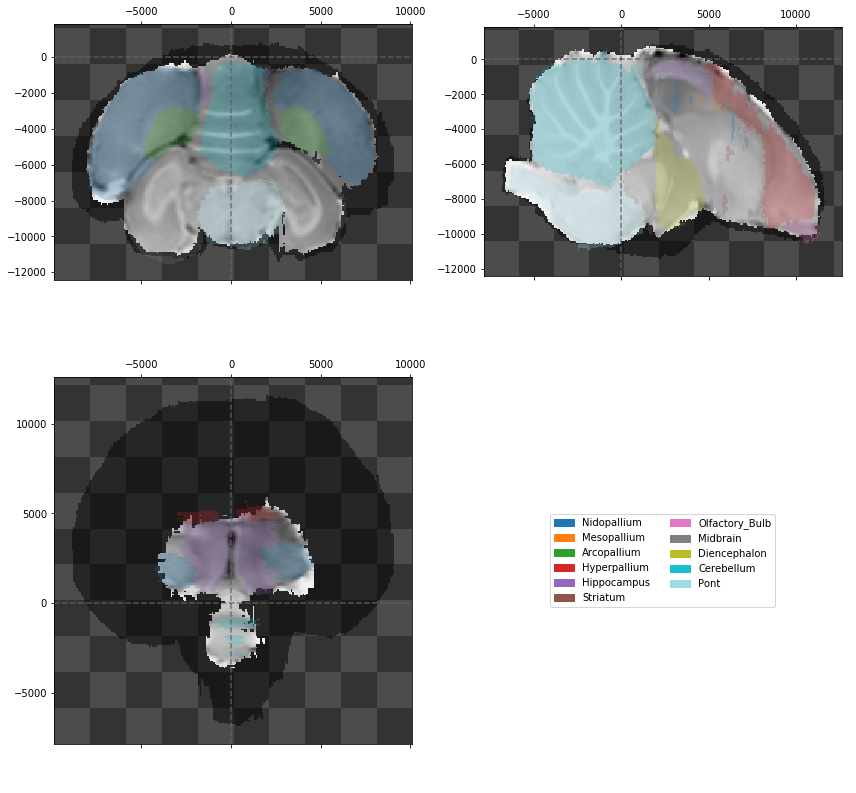

In [4]:
plot_2d_coordinates(starling_atlas, point_in_um= [0,0,0]);

### propose an updated y-sinus

In [5]:
updated_y_sinus = [0, 1500, -200]

{'medial-lateral': 0, 'anterior-posterior': 1500, 'dorsal-ventral': -200}


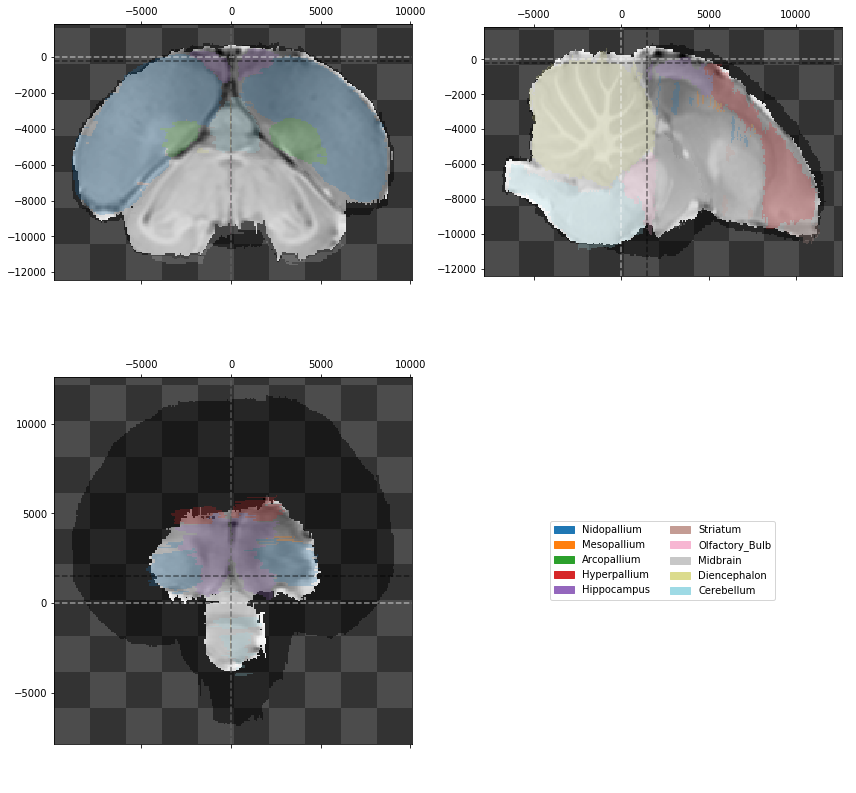

In [6]:
plot_2d_coordinates(starling_atlas, point_in_um= updated_y_sinus);

### Update the y-sinus in atlas

In [7]:
starling_atlas.update_y_sinus(updated_y_sinus=updated_y_sinus)

{'medial-lateral': 0, 'anterior-posterior': 0, 'dorsal-ventral': 0}


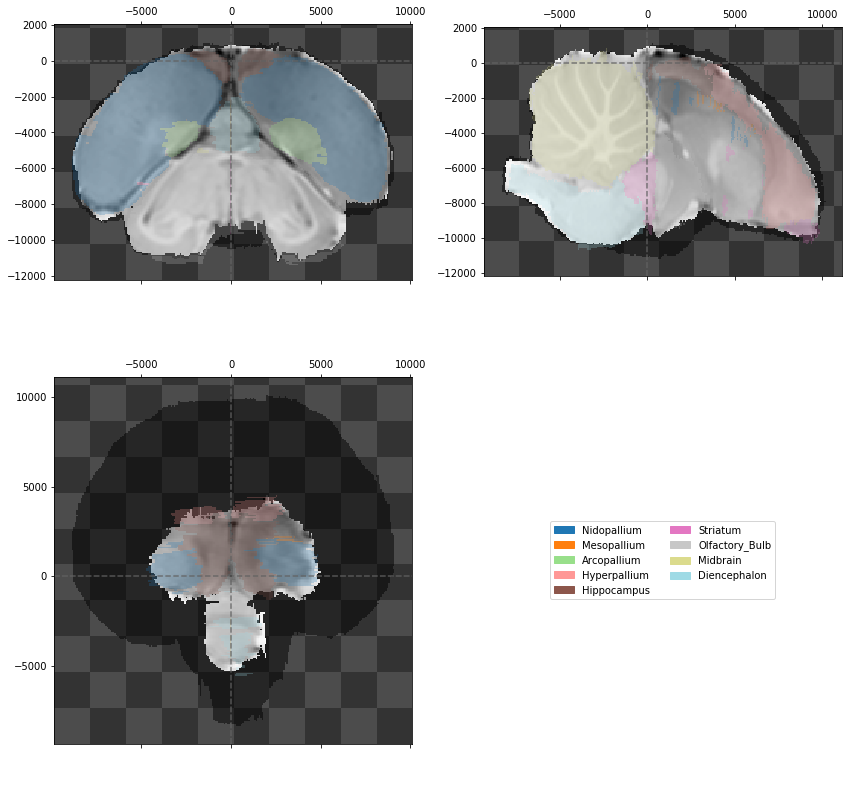

In [8]:
plot_2d_coordinates(starling_atlas, point_in_um= [0,0,0]);

### Plot skull with brain

In [9]:
starling_atlas.voxel_data.columns

Index(['type_', 'src', 'voxels', 'affine'], dtype='object')

In [10]:
starling_atlas.voxel_data.index

Index(['Brain', 'Ventricle', 'Nuclei', 'Brainregions', 'Tracts', 'T2star_hr',
       'Ct', 'T2', 'Pd'],
      dtype='object')

{'medial-lateral': 0, 'anterior-posterior': 0, 'dorsal-ventral': 0}
[126  98 203]
testtest
testtest
testtest


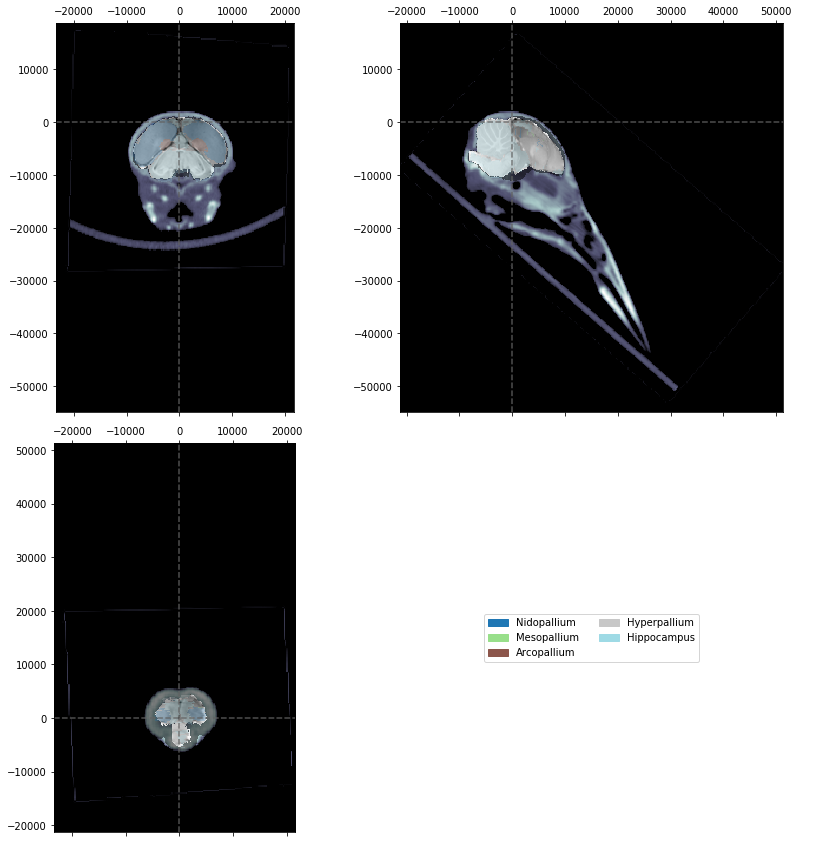

In [27]:
test = plot_2d_coordinates(starling_atlas, point_in_um= [0,0,0], bg_image='Ct');